In [286]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn

In [287]:
df=pd.read_excel('Data_Train.xlsx')
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


In [288]:
# df.drop('Title',axis=1,inplace=True)
df.drop('Synopsis',axis=1,inplace=True)


In [289]:
df

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Action & Adventure (Books),Action & Adventure,319.00


In [290]:
dt=pd.read_excel('Data_Test.xlsx')
dt.drop('Synopsis',axis=1,inplace=True)
dt

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,Linguistics (Books),"Language, Linguistics & Writing"
...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,United States History,"Biographies, Diaries & True Accounts"


In [291]:
frames = [df, dt]
result = pd.concat(frames).reset_index()

In [292]:
result

,index,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
7792,1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,Design,"Computing, Internet & Digital Media",NaN
7793,1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,Children's Reference (Books),"Biographies, Diaries & True Accounts",NaN
7794,1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,Humour (Books),Humour,NaN
7795,1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,United States History,"Biographies, Diaries & True Accounts",NaN


In [293]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
result['Title']= label_encoder.fit_transform(result['Title']) 
result['Title'].unique() 




array([5803, 2120, 2982, ..., 5483, 3810, 1139])

In [294]:
result['Author']= label_encoder.fit_transform(result['Author']) 
result['Author'].unique() 


array([ 748,  370, 4045, ...,  317, 2710, 1517])

In [295]:
result['Edition']= label_encoder.fit_transform(result['Edition']) 
result['Edition'].unique() 


array([1231, 3164, 2272, ...,  104, 1911, 1677])

In [296]:
result['Reviews']= label_encoder.fit_transform(result['Reviews']) 
result['Reviews'].unique() 


array([25, 24, 33, 26, 35, 30, 29, 32, 27, 34, 20, 23, 28, 16, 31,  5, 22,
       17, 11, 13, 19, 14, 18, 15, 10,  0, 21, 12,  2,  8,  4,  7,  1,  9,
        3,  6])

In [297]:
result['Ratings']= label_encoder.fit_transform(result['Ratings']) 
result['Ratings'].unique() 


array([324,  57, 286,  47,   0, 311,  77,  27,  49,  87, 231, 185, 264,
       111, 140, 317,  15, 350,  66, 208, 198, 261, 292, 290, 308,  97,
       366,  36, 363, 173, 177, 164, 162, 144,  64, 358, 142, 211, 300,
       117, 226,  89, 230, 242,  60,  25, 333, 257,  83, 188, 269, 319,
       204, 220, 271, 169, 265, 109, 159,  30, 255, 267,  79,  52, 238,
        73,  11, 356, 134, 217,  71, 315, 253, 145, 274, 105, 259, 235,
       148, 132, 180, 152, 316, 224, 251, 252, 245, 125, 143, 334, 305,
        23, 268, 282,  24, 346, 192, 360, 241, 121, 335, 361, 310,  85,
       284, 233,  18,  17, 296, 309,  21, 355, 196, 223, 293,  94,  55,
        82, 158, 123, 294, 278, 108, 330,  12, 280, 288, 325, 191, 313,
       107,  72, 323,  45, 343, 351, 174, 279,  54, 367, 234, 166, 352,
       285, 338, 301, 329, 139,  35, 258, 306, 150, 240, 337, 248,   2,
        86, 225, 322,  59, 133, 314, 113,   1, 138, 295,  78,  58, 114,
       236,  38, 345, 209, 106, 332, 153, 129,  31, 136, 247,  5

In [298]:
result['Genre']= label_encoder.fit_transform(result['Genre']) 
result['Genre'].unique() 


array([  1,  78, 202,  96, 264, 170, 100, 325,  35,  25,  31,  87,  69,
       227,  22, 313, 160, 200,  99,  86, 257, 304,  27, 294, 103, 207,
       342, 323,  89, 146, 219, 242, 256, 346, 222, 310, 195, 277, 231,
       193, 247,  80, 109,  91, 162,  23, 301, 187, 168, 196, 291, 217,
       352, 122, 190, 305, 125,  46, 188,  58, 171,  63, 272, 208,  64,
       328, 260, 116, 359,  44,  41, 300,  94, 191,  85,   5,  59, 172,
       216, 152, 289, 282,  72, 141,  16, 261, 229, 214, 358, 307, 165,
        26, 133, 330,  12, 150, 215, 269, 335, 240, 111,  81, 276, 184,
       154, 139,  60, 117, 336,  19, 186,  67, 204, 183, 140, 275,   8,
       128,  93, 145, 124,  17, 174,  92, 189, 351, 350,  62, 314, 332,
       283, 281, 278, 347,  53, 270, 362, 249, 156, 157, 164, 114, 179,
       115,  29, 134, 148, 203, 211, 315, 173, 158,  97, 118,  61,  90,
       230, 268, 126, 322, 321,  70,  57,  11, 293, 241, 327, 235, 213,
        10, 138, 284, 223, 181, 123, 273,  36, 221, 345, 341,  7

In [299]:
result['BookCategory']= label_encoder.fit_transform(result['BookCategory']) 
result['BookCategory'].unique() 


array([ 0,  2,  6,  5,  1, 10,  7,  4,  9,  3,  8])

In [300]:
result

,index,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,0,5803,748,1231,25,324,1,0,220.00
1,1,2120,370,3164,24,57,78,2,202.93
2,2,2982,4045,2272,33,286,202,6,299.00
3,3,189,79,3000,26,47,96,5,180.00
4,4,2853,1138,99,35,0,264,1,965.62
...,...,...,...,...,...,...,...,...,...
7792,1555,16,3935,1438,35,231,103,4,NaN
7793,1556,3313,27,3222,21,47,72,2,NaN
7794,1557,5483,2159,3086,25,264,186,6,NaN
7795,1558,3810,1517,2135,20,185,347,2,NaN


In [301]:
result.corr()

,index,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
index,1.000000,-0.008964,0.000826,-0.003744,0.009381,-0.009546,-0.014315,-0.004651,0.023604
Title,-0.008964,1.000000,0.041747,0.010022,-0.001667,-0.007021,-0.034079,-0.009503,-0.013483
Author,0.000826,0.041747,1.000000,-0.002351,-0.022856,-0.003295,0.008007,0.001157,-0.002702
Edition,-0.003744,0.010022,-0.002351,1.000000,-0.016690,0.003892,-0.004216,0.013542,-0.113555
Reviews,0.009381,-0.001667,-0.022856,-0.016690,1.000000,-0.056235,-0.002638,-0.037331,0.112949
Ratings,-0.009546,-0.007021,-0.003295,0.003892,-0.056235,1.000000,-0.023939,-0.032339,-0.091778
Genre,-0.014315,-0.034079,0.008007,-0.004216,-0.002638,-0.023939,1.000000,0.421293,0.061085
BookCategory,-0.004651,-0.009503,0.001157,0.013542,-0.037331,-0.032339,0.421293,1.000000,-0.011616
Price,0.023604,-0.013483,-0.002702,-0.113555,0.112949,-0.091778,0.061085,-0.011616,1.000000


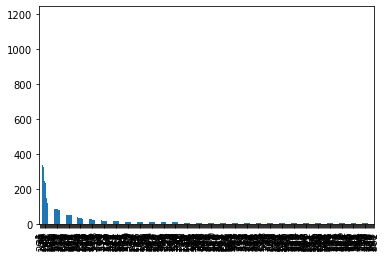

In [302]:
result['Genre'].value_counts().plot(kind='bar')

In [303]:
df.shape
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [304]:
df

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Action & Adventure (Books),Action & Adventure,319.00


In [305]:
import seaborn as sns

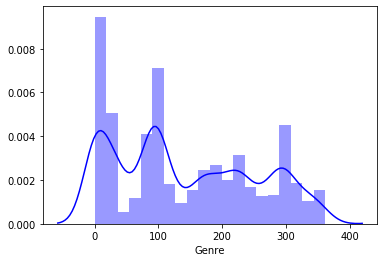

In [306]:
sns.distplot(result['Genre'],bins=20,color='blue')

In [307]:
df

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Action & Adventure (Books),Action & Adventure,319.00


In [308]:
result.drop('index',axis=1)

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,5803,748,1231,25,324,1,0,220.00
1,2120,370,3164,24,57,78,2,202.93
2,2982,4045,2272,33,286,202,6,299.00
3,189,79,3000,26,47,96,5,180.00
4,2853,1138,99,35,0,264,1,965.62
...,...,...,...,...,...,...,...,...
7792,16,3935,1438,35,231,103,4,NaN
7793,3313,27,3222,21,47,72,2,NaN
7794,5483,2159,3086,25,264,186,6,NaN
7795,3810,1517,2135,20,185,347,2,NaN


In [309]:
data_train=result.iloc[:6236]
data_test=result.iloc[6237:].reset_index()

In [310]:
# data_test.drop('index',axis=1,inplace=True)
# data_test.drop('level_0',axis=1,inplace=True)
# data_test.drop('Price',axis=1,inplace=True)
data_test

,level_0,index,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,6237,0,5087,3769,803,29,361,304,5,NaN
1,6238,1,2907,1303,3601,35,0,255,4,NaN
2,6239,2,753,887,1717,35,231,294,9,NaN
3,6240,3,6233,166,2038,26,25,275,4,NaN
4,6241,4,3787,3261,2351,29,350,219,7,NaN
...,...,...,...,...,...,...,...,...,...,...
1555,7792,1555,16,3935,1438,35,231,103,4,NaN
1556,7793,1556,3313,27,3222,21,47,72,2,NaN
1557,7794,1557,5483,2159,3086,25,264,186,6,NaN
1558,7795,1558,3810,1517,2135,20,185,347,2,NaN


In [311]:
X = data_train[[ 'Title','Author', 'Edition', 'Reviews', 'Ratings','Genre','BookCategory']]


In [312]:
X

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,5803,748,1231,25,324,1,0
1,2120,370,3164,24,57,78,2
2,2982,4045,2272,33,286,202,6
3,189,79,3000,26,47,96,5
4,2853,1138,99,35,0,264,1
...,...,...,...,...,...,...,...
6231,2055,1387,2644,26,237,294,9
6232,2390,4102,3185,35,111,17,6
6233,5039,3843,2076,18,350,96,5
6234,5195,2013,3208,23,185,294,9


In [313]:
# X=scaler.fit_transform(X)

In [314]:
Y=data_train['Price']

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4988, 7)
(1248, 7)
(4988,)
(1248,)


In [316]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [317]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,model.predict(X_test))**(1/2)

586.5886114099101

In [318]:
# coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
# coeff_parameter

In [319]:
X_test = data_test[['Title', 'Author', 'Edition', 'Reviews', 'Ratings','Genre','BookCategory']]

In [320]:
# data_test.drop('level_0',axis=1,inplace=True)
data_test

,level_0,index,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,6237,0,5087,3769,803,29,361,304,5,NaN
1,6238,1,2907,1303,3601,35,0,255,4,NaN
2,6239,2,753,887,1717,35,231,294,9,NaN
3,6240,3,6233,166,2038,26,25,275,4,NaN
4,6241,4,3787,3261,2351,29,350,219,7,NaN
...,...,...,...,...,...,...,...,...,...,...
1555,7792,1555,16,3935,1438,35,231,103,4,NaN
1556,7793,1556,3313,27,3222,21,47,72,2,NaN
1557,7794,1557,5483,2159,3086,25,264,186,6,NaN
1558,7795,1558,3810,1517,2135,20,185,347,2,NaN


In [321]:
pred = model.predict(X_test)
pred

array([ 359.2641, 1422.5426,  376.8983, ...,  410.566 ,  294.4094,
        527.668 ])

In [322]:
# sub = pd.read_excel('submission.xlsx')

In [323]:
sub = pd.DataFrame(columns=['Price'])
for i in range(1560):
    sub = sub.append({'Price': i}, ignore_index=True)
sub

,Price
0,0
1,1
2,2
3,3
4,4
...,...
1555,1555
1556,1556
1557,1557
1558,1558


In [324]:
sub['Price']=pred.astype(int)

In [325]:
sub

,Price
0,359
1,1422
2,376
3,934
4,334
...,...
1555,1490
1556,294
1557,410
1558,294


In [326]:
# sub['Price'] = pred.astype(int)

In [327]:
sub

,Price
0,359
1,1422
2,376
3,934
4,334
...,...
1555,1490
1556,294
1557,410
1558,294


In [328]:
sub.to_excel('submission.xlsx',index=False)

In [113]:
# op.to_excel('submit.xlsx',index=False)
# op.to_csv('submit.csv',index=False)


In [114]:
# sns.histplot(X_test)

In [115]:
# import statsmodels.api as sm
# X_train_Sm= sm.add_constant(X_train)
# X_train_Sm= sm.add_constant(X_train)
# ls=sm.OLS(y_train,X_train_Sm).fit()
# print(ls.summary())

In [116]:
# !pip install xlsxwriter

In [117]:
# import xlsxwriter as xlsw
# op = pd.DataFrame(pred)
# op = op.transpose()
# xlsfile = 'submit.xlsx'
# writer = pd.ExcelWriter(xlsfile, engine='xlsxwriter')

# op.to_excel(writer, sheet_name="Sheet1Name",startrow=1, startcol=1, header=False, index=False) 

# GradientBoostingRegressor model

In [118]:
# from sklearn.linear_model import GradientBoostingRegressor
# from sklearn.ensemble import GradientBoostingRegressor